In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('CBC Report.csv')
df.head()

,Serial,Date,Gender,Age,Haemoglobin,ESR,WBC,Neutrophil,Lymphocyte,Monocyte,Eosinophil,Basophil,RBC,Platelets,Result
0,A2308164543,2/8/2023,Female,40.0,11.2,32.0,11.30,65,23.0,10.0,2.0,0.0,4.04,30,Positive
1,A2308164502,2/8/2023,Male,13.0,11.6,59.0,7.80,49,42.0,9.0,0.0,0.0,4.34,40,Positive
2,A2308164673,3/8/2023,Male,23.0,15.1,NaN,3.85,65,25.0,9.0,1.0,0.0,5.43,30,Positive
3,A2308164685,3/8/2023,Male,58.0,8.5,NaN,10.30,85,6.0,6.0,3.0,0.0,3.00,30,Positive
4,A2308164626,2/8/2023,Female,35.0,12.0,28.0,6.70,54,20.0,4.0,1.0,0.0,4.30,40,Positive


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Serial       300 non-null    object 
 1   Date         301 non-null    object 
 2   Gender       301 non-null    object 
 3   Age          301 non-null    float64
 4   Haemoglobin  301 non-null    float64
 5   ESR          255 non-null    float64
 6   WBC          301 non-null    float64
 7   Neutrophil   301 non-null    int64  
 8   Lymphocyte   300 non-null    float64
 9   Monocyte     300 non-null    float64
 10  Eosinophil   300 non-null    float64
 11  Basophil     300 non-null    float64
 12  RBC          300 non-null    float64
 13  Platelets    301 non-null    int64  
 14  Result       301 non-null    object 
dtypes: float64(9), int64(2), object(4)
memory usage: 35.4+ KB


In [5]:
df = df.dropna()

In [6]:
df.isnull().sum()

Serial         0
Date           0
Gender         0
Age            0
Haemoglobin    0
ESR            0
WBC            0
Neutrophil     0
Lymphocyte     0
Monocyte       0
Eosinophil     0
Basophil       0
RBC            0
Platelets      0
Result         0
dtype: int64

In [7]:
del df['Serial']
del df['Date']

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 255 entries, 0 to 300
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Gender       255 non-null    object 
 1   Age          255 non-null    float64
 2   Haemoglobin  255 non-null    float64
 3   ESR          255 non-null    float64
 4   WBC          255 non-null    float64
 5   Neutrophil   255 non-null    int64  
 6   Lymphocyte   255 non-null    float64
 7   Monocyte     255 non-null    float64
 8   Eosinophil   255 non-null    float64
 9   Basophil     255 non-null    float64
 10  RBC          255 non-null    float64
 11  Platelets    255 non-null    int64  
 12  Result       255 non-null    object 
dtypes: float64(9), int64(2), object(2)
memory usage: 27.9+ KB


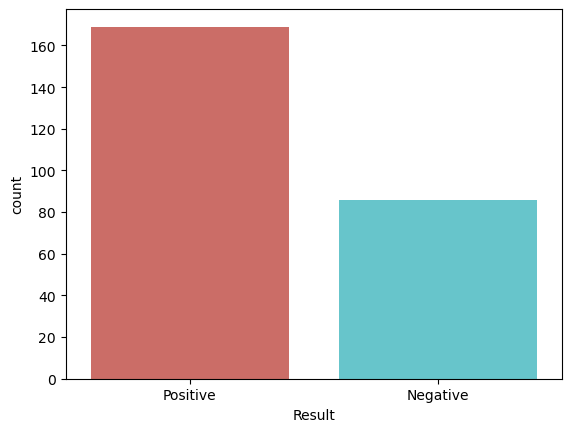

In [9]:
sns.countplot(x='Result',data=df, palette='hls')
plt.show()
#plt.savefig('count_plot') mal: the nodule malignancy, 0: benign, 1: malignant

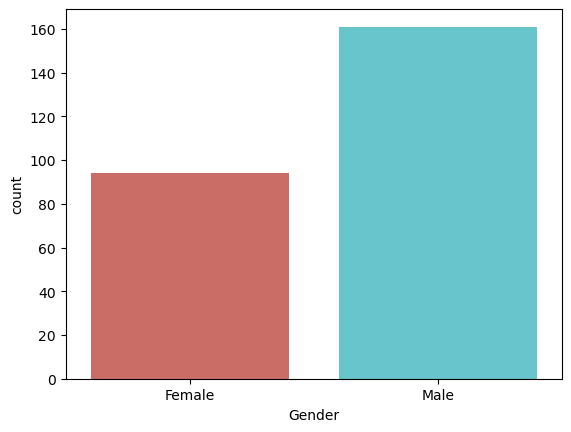

In [10]:
sns.countplot(x='Gender',data=df, palette='hls')
plt.show()
#plt.savefig('count_plot') mal: the nodule malignancy, 0: benign, 1: malignant

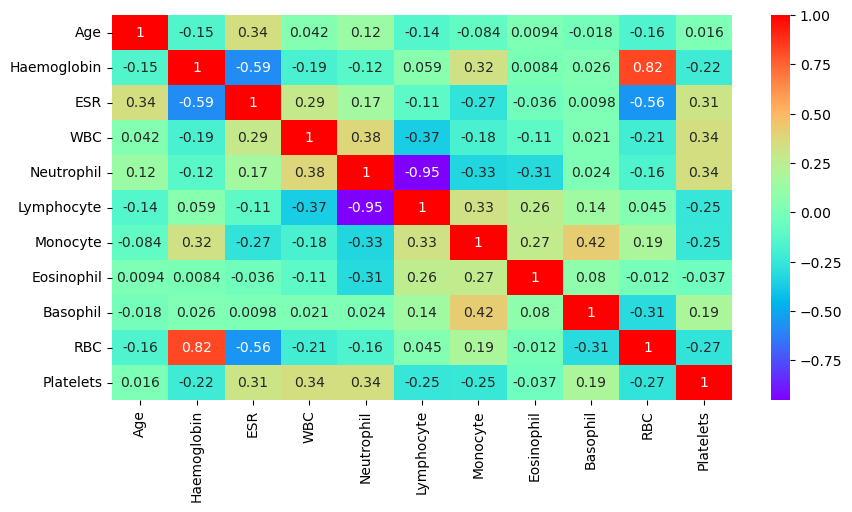

In [11]:
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(), annot = True, cmap="rainbow")
plt.show()

In [12]:
# Import label encoder 
from sklearn import preprocessing 

# label_encoder object knows 
# how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

# Encode labels in column 'species'. 
df['Gender']= label_encoder.fit_transform(df['Gender'])
df['Result']= label_encoder.fit_transform(df['Result'])

In [13]:
X = df.drop(["Result"],axis =1)
y = df["Result"]

# FS

In [14]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [15]:
print(model.feature_importances_) 

[0.02409031 0.06416495 0.05905846 0.07187666 0.06327522 0.08677568
 0.06859334 0.06921142 0.04314529 0.00226774 0.05944139 0.38809954]


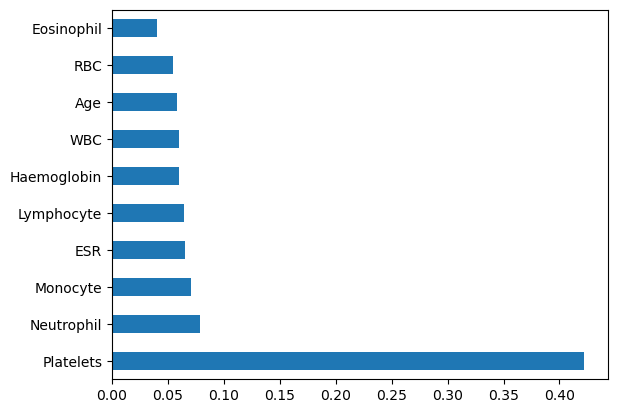

In [16]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show() 

In [16]:
X_fea = df[['Eosinophil','RBC','Age','WBC','Haemoglobin','Lymphocyte','ESR','Monocyte','Neutrophil','Platelets']]
y_fea = df['Result']

In [17]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_res, y_res = sm.fit_resample(X_fea,y_fea)

In [18]:
ML_Model = []
accuracy = []
precision = []
f1score = []
recall = []
auc = []

#function to call for storing the results
def storeResults(model, a,b,c,d,e):
    ML_Model.append(model)
    accuracy.append(round(a, 3))
    precision.append(round(b, 3))
    recall.append(round(c, 3))
    f1score.append(round(d, 3))
    auc.append(round(e,3))

In [19]:
from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score,roc_auc_score

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_res, y_res, test_size=0.20, random_state=42)
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((270, 10), (270,), (68, 10), (68,))

# Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class='ovr', solver='liblinear', C=1.0)
lr.fit(X_train, y_train)

y_pred    = lr.predict(X_valid)

lr_acc = accuracy_score(y_pred, y_valid)
lr_prec = precision_score(y_pred, y_valid,average='weighted')
lr_rec = recall_score(y_pred, y_valid,average='weighted')
lr_f1 = f1_score(y_pred, y_valid,average='weighted')
lr_auroc = roc_auc_score(y_train, lr.predict_proba(X_train)[:, 1])

In [22]:
storeResults('Logistic Regression',lr_acc,lr_prec,lr_rec,lr_f1,lr_auroc)

# SVM

In [23]:
from sklearn import svm
svc = svm.SVC(decision_function_shape='ovo',probability=True)
svc.fit(X_train, y_train)

y_pred    = svc.predict(X_valid)

svc_acc = accuracy_score(y_pred, y_valid)
svc_prec = precision_score(y_pred, y_valid,average='weighted')
svc_rec = recall_score(y_pred, y_valid,average='weighted')
svc_f1 = f1_score(y_pred, y_valid,average='weighted')
svc_auroc = roc_auc_score(y_train, svc.predict_proba(X_train)[:, 1])

In [24]:
storeResults('SVM',svc_acc,svc_prec,svc_rec,svc_f1,svc_auroc)

# Naive Bayes

In [25]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred    = nb.predict(X_valid)

nb_acc = accuracy_score(y_pred, y_valid)
nb_prec = precision_score(y_pred, y_valid,average='weighted')
nb_rec = recall_score(y_pred, y_valid,average='weighted')
nb_f1 = f1_score(y_pred, y_valid,average='weighted')
nb_auroc = roc_auc_score(y_train, nb.predict_proba(X_train)[:, 1])

In [26]:
storeResults('NaiveBayes',nb_acc,nb_prec,nb_rec,nb_f1,nb_auroc)

# Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(X_train, y_train)

y_pred    = rf.predict(X_valid)

rf_acc = accuracy_score(y_pred, y_valid)
rf_prec = precision_score(y_pred, y_valid,average='weighted')
rf_rec = recall_score(y_pred, y_valid,average='weighted')
rf_f1 = f1_score(y_pred, y_valid,average='weighted')
rf_auroc = roc_auc_score(y_train, rf.predict_proba(X_train)[:, 1])

In [28]:
storeResults('RandomForest',rf_acc,rf_prec,rf_rec,rf_f1,rf_auroc)

# AdaBoost

In [29]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=100, algorithm="SAMME", random_state=0)

ada.fit(X_train, y_train)

y_pred    = ada.predict(X_valid)

ada_acc = accuracy_score(y_pred, y_valid)
ada_prec = precision_score(y_pred, y_valid,average='weighted')
ada_rec = recall_score(y_pred, y_valid,average='weighted')
ada_f1 = f1_score(y_pred, y_valid,average='weighted')
ada_auroc = roc_auc_score(y_train, ada.predict_proba(X_train)[:, 1])

In [30]:
storeResults('AdaBoost',ada_acc,ada_prec,ada_rec,ada_f1,ada_auroc)

# XGBoost

In [31]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred    = xgb.predict(X_valid)

xgb_acc = accuracy_score(y_pred, y_valid)
xgb_prec = precision_score(y_pred, y_valid,average='weighted')
xgb_rec = recall_score(y_pred, y_valid,average='weighted')
xgb_f1 = f1_score(y_pred, y_valid,average='weighted')
xgb_auroc = roc_auc_score(y_train, xgb.predict_proba(X_train)[:, 1])

In [32]:
storeResults('XGBoost',xgb_acc,xgb_prec,xgb_rec,xgb_f1,xgb_auroc)

# MLP

In [33]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=1, max_iter=300)

mlp.fit(X_train, y_train)

y_pred    = mlp.predict(X_valid)

mlp_acc = accuracy_score(y_pred, y_valid)
mlp_prec = precision_score(y_pred, y_valid,average='weighted')
mlp_rec = recall_score(y_pred, y_valid,average='weighted')
mlp_f1 = f1_score(y_pred, y_valid,average='weighted')
mlp_auroc = roc_auc_score(y_train, mlp.predict_proba(X_train)[:, 1])

In [34]:
storeResults('MLP',mlp_acc,mlp_prec,mlp_rec,mlp_f1,mlp_auroc)

# LightGBM

In [35]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(n_estimators=10)
lgbm.fit(X_train, y_train)

y_pred    = lgbm.predict(X_valid)

lgbm_acc = accuracy_score(y_pred, y_valid)
lgbm_prec = precision_score(y_pred, y_valid,average='weighted')
lgbm_rec = recall_score(y_pred, y_valid,average='weighted')
lgbm_f1 = f1_score(y_pred, y_valid,average='weighted')
lgbm_auroc = roc_auc_score(y_train, lgbm.predict_proba(X_train)[:, 1])

[LightGBM] [Info] Number of positive: 126, number of negative: 144
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000106 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 557
[LightGBM] [Info] Number of data points in the train set: 270, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.466667 -> initscore=-0.133531
[LightGBM] [Info] Start training from score -0.133531
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

In [36]:
storeResults('LightGBM',lgbm_acc,lgbm_prec,lgbm_rec,lgbm_f1,lgbm_auroc)

# Stacking Classifier

In [37]:
from sklearn.ensemble import StackingClassifier, ExtraTreesClassifier
from lightgbm import LGBMClassifier

estimators = [('XGB', xgb),('LR', lr),('MLP', mlp)]

stac = StackingClassifier(estimators=estimators, final_estimator=LGBMClassifier(n_estimators=10))

In [38]:
stac.fit(X_train, y_train)

y_pred    = stac.predict(X_valid)

stac_acc = accuracy_score(y_pred, y_valid)
stac_prec = precision_score(y_pred, y_valid,average='weighted')
stac_rec = recall_score(y_pred, y_valid,average='weighted')
stac_f1 = f1_score(y_pred, y_valid,average='weighted')
stac_auroc = roc_auc_score(y_train, stac.predict_proba(X_train)[:, 1])

[LightGBM] [Info] Number of positive: 126, number of negative: 144
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000062 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 273
[LightGBM] [Info] Number of data points in the train set: 270, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.466667 -> initscore=-0.133531
[LightGBM] [Info] Start training from score -0.133531
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [39]:
storeResults('Proposed',stac_acc,stac_prec,stac_rec,stac_f1,stac_auroc)

# Extension

In [40]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier

bdt = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), algorithm="SAMME", n_estimators=200
)
tree = ExtraTreesClassifier()

clf = VotingClassifier(estimators= [('BoostedDT', bdt),('ET', tree)], voting='soft')

clf.fit(X_train, y_train)

y_pred    = clf.predict(X_valid)

vot_acc = accuracy_score(y_pred, y_valid)
vot_prec = precision_score(y_pred, y_valid,average='weighted')
vot_rec = recall_score(y_pred, y_valid,average='weighted')
vot_f1 = f1_score(y_pred, y_valid,average='weighted')
vot_auroc = roc_auc_score(y_train, clf.predict_proba(X_train)[:, 1])

In [41]:
storeResults('Extension',vot_acc,vot_prec,vot_rec,vot_f1,vot_auroc)

# FNN

In [42]:
import tensorflow as tf
#import tensorflow_hub as hub

In [44]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
        
])

In [45]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [46]:
model.fit(X_train, y_train, batch_size=2, epochs=20, 
         validation_data=(X_valid, y_valid))

Epoch 1/20
135/135 [==============================] - 2s 5ms/step - loss: 8.4411 - accuracy: 0.6407 - val_loss: 1.0710 - val_accuracy: 0.8235
Epoch 2/20
135/135 [==============================] - 0s 4ms/step - loss: 0.6842 - accuracy: 0.8519 - val_loss: 0.6526 - val_accuracy: 0.8529
Epoch 3/20
135/135 [==============================] - 0s 3ms/step - loss: 0.4145 - accuracy: 0.8407 - val_loss: 0.9770 - val_accuracy: 0.8088
Epoch 4/20
135/135 [==============================] - 0s 3ms/step - loss: 0.4085 - accuracy: 0.8667 - val_loss: 0.6066 - val_accuracy: 0.8088
Epoch 5/20
135/135 [==============================] - 0s 3ms/step - loss: 0.3444 - accuracy: 0.8667 - val_loss: 0.4285 - val_accuracy: 0.8529
Epoch 6/20
135/135 [==============================] - 0s 4ms/step - loss: 0.3445 - accuracy: 0.8630 - val_loss: 0.4364 - val_accuracy: 0.8235
Epoch 7/20
135/135 [==============================] - 0s 4ms/step - loss: 0.3496 - accuracy: 0.8630 - val_loss: 0.6637 - val_accuracy: 0.8088
Epoch 

In [47]:
y_pred = model.predict(X_valid)

3/3 [==============================] - 0s 2ms/step


In [48]:
y_pred = (y_pred > 0.5)

nn_acc = accuracy_score(y_pred, y_valid)
nn_prec = precision_score(y_pred, y_valid,average='weighted')
nn_f1 = f1_score(y_pred, y_valid,average='weighted')
nn_auroc = roc_auc_score(y_train, clf.predict_proba(X_train)[:, 1])
nn_rec = recall_score(y_pred, y_valid,average='weighted')

In [49]:
storeResults('FNN',nn_acc,nn_prec,nn_rec,nn_f1,nn_auroc)

# ANN

In [50]:
from tensorflow.keras import models, layers, optimizers, regularizers
import numpy as np
import random
from sklearn import model_selection, preprocessing
import tensorflow as tf
from tqdm import tqdm

In [51]:
# splitting the dataset 80% for training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res, test_size=0.20, random_state=42)

In [52]:
x_train = preprocessing.normalize(X_train)
x_test = preprocessing.normalize(X_test)

In [53]:
hidden_units = 10     # how many neurons in the hidden layer
activation = 'relu'   # activation function for hidden layer
l2 = 0.01             # regularization - how much we penalize large parameter values
learning_rate = 0.01  # how big our steps are in gradient descent
epochs = 5            # how many epochs to train for
batch_size = 2       # how many samples to use for each gradient descent update

In [54]:
# create a sequential model
model2 = models.Sequential()

# add the hidden layer
model2.add(layers.Dense(input_dim=10,
                       units=hidden_units, 
                       activation=activation))

# add the output layer
model2.add(layers.Dense(input_dim=hidden_units,
                       units=1,
                       activation='sigmoid'))

# define our loss function and optimizer
model2.compile(loss='binary_crossentropy',
              # Adam is a kind of gradient descent
              optimizer=optimizers.Adam(lr=learning_rate),
              metrics=['accuracy'])

In [55]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                110       
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [56]:
history = model2.fit(x_train, y_train, epochs=20, batch_size=batch_size)

Epoch 1/20
135/135 [==============================] - 1s 3ms/step - loss: 0.5127 - accuracy: 0.8074
Epoch 2/20
135/135 [==============================] - 0s 3ms/step - loss: 0.3147 - accuracy: 0.8926
Epoch 3/20
135/135 [==============================] - 0s 3ms/step - loss: 0.2779 - accuracy: 0.8704
Epoch 4/20
135/135 [==============================] - 0s 3ms/step - loss: 0.2517 - accuracy: 0.8852
Epoch 5/20
135/135 [==============================] - 0s 3ms/step - loss: 0.2608 - accuracy: 0.8926
Epoch 6/20
135/135 [==============================] - 0s 3ms/step - loss: 0.2596 - accuracy: 0.8815
Epoch 7/20
135/135 [==============================] - 0s 3ms/step - loss: 0.2660 - accuracy: 0.8926
Epoch 8/20
135/135 [==============================] - 0s 3ms/step - loss: 0.2591 - accuracy: 0.8963
Epoch 9/20
135/135 [==============================] - 0s 3ms/step - loss: 0.2627 - accuracy: 0.8963
Epoch 10/20
135/135 [==============================] - 0s 3ms/step - loss: 0.2532 - accuracy: 0.8926

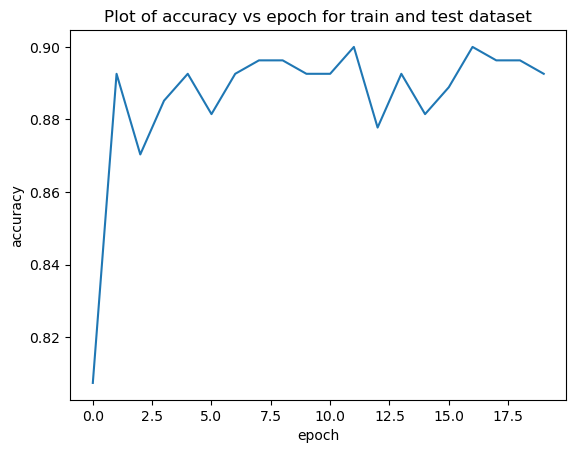

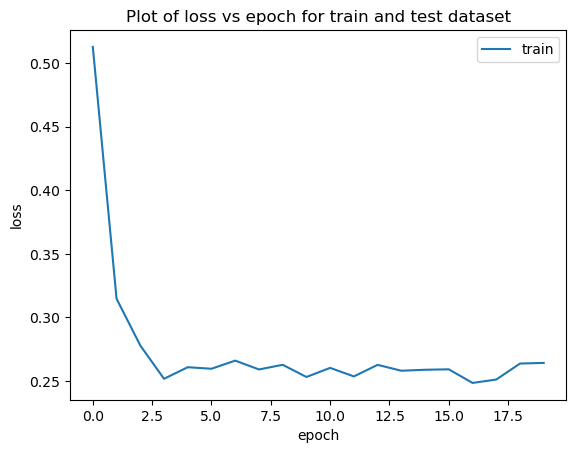

In [57]:
# Plot of accuracy vs epoch for train and test dataset
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

# Plot of loss vs epoch for train and test dataset
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [58]:
y_pred = model2.predict(X_test, verbose=1)
y_pred = np.argmax(y_pred,axis=1)

#y_prob = cnnmodel.predict_proba(X_test)[:, 1]

dnn_acc = accuracy_score(y_pred, y_test)
dnn_prec = precision_score(y_pred, y_test,average='weighted')
dnn_rec = recall_score(y_pred, y_test,average='weighted')
dnn_f1 = f1_score(y_pred, y_test,average='weighted')
dnn_auroc = roc_auc_score(y_train, clf.predict_proba(X_train)[:, 1])

3/3 [==============================] - 0s 2ms/step


In [59]:
storeResults('ANN',dnn_acc,dnn_prec,dnn_rec,dnn_f1,dnn_auroc)

# CNN

In [60]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from keras.layers import Dense, Conv1D, MaxPool1D, Flatten, Dropout # importing dense layer
from keras.models import Sequential #importing Sequential layer
from keras.layers import Input
from keras.models import Model

In [61]:
# splitting the dataset 80% for training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res, test_size=0.20, random_state=42)

In [62]:
X_train=X_train.values
X_test=X_test.values

X_train = X_train.reshape(-1, X_train.shape[1],1)
X_test = X_test.reshape(-1, X_test.shape[1],1)

Y_train=to_categorical(y_train)
Y_test=to_categorical(y_test)

In [63]:
verbose, epoch, batch_size = 1, 100, 2
activationFunction='relu'

def CNN():
    
    cnnmodel = Sequential()
    cnnmodel.add(Conv1D(filters=128, kernel_size=2, activation='relu',input_shape=(X_train.shape[1],X_train.shape[2])))
    cnnmodel.add(MaxPooling1D(pool_size=2))
    cnnmodel.add(Dropout(rate=0.2))
    cnnmodel.add(Flatten())
    cnnmodel.add(Dense(2, activation='softmax'))
    cnnmodel.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
    cnnmodel.summary()
    return cnnmodel

cnnmodel = CNN()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 9, 128)            384       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 4, 128)           0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 4, 128)            0         
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 1,410
Trainable params: 1,410
Non-trainable params: 0
____________________________________________________

In [64]:
modelhistory = cnnmodel.fit(X_train, Y_train, epochs=20, verbose=verbose, validation_split=0.2, batch_size = batch_size)

Epoch 1/20
108/108 [==============================] - 4s 5ms/step - loss: 1.4058 - accuracy: 0.5787 - val_loss: 1.6710 - val_accuracy: 0.4815
Epoch 2/20
108/108 [==============================] - 0s 4ms/step - loss: 1.2864 - accuracy: 0.6065 - val_loss: 0.9958 - val_accuracy: 0.5556
Epoch 3/20
108/108 [==============================] - 0s 4ms/step - loss: 1.2931 - accuracy: 0.5926 - val_loss: 0.7742 - val_accuracy: 0.5370
Epoch 4/20
108/108 [==============================] - 0s 3ms/step - loss: 1.1548 - accuracy: 0.5926 - val_loss: 1.3698 - val_accuracy: 0.4815
Epoch 5/20
108/108 [==============================] - 0s 3ms/step - loss: 0.7839 - accuracy: 0.6898 - val_loss: 1.0734 - val_accuracy: 0.5741
Epoch 6/20
108/108 [==============================] - 0s 3ms/step - loss: 0.9474 - accuracy: 0.6019 - val_loss: 0.6545 - val_accuracy: 0.6296
Epoch 7/20
108/108 [==============================] - 0s 3ms/step - loss: 0.9002 - accuracy: 0.6250 - val_loss: 1.5212 - val_accuracy: 0.4630
Epoch 

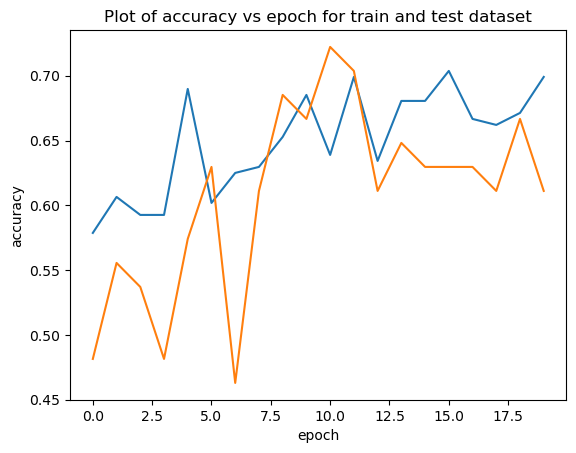

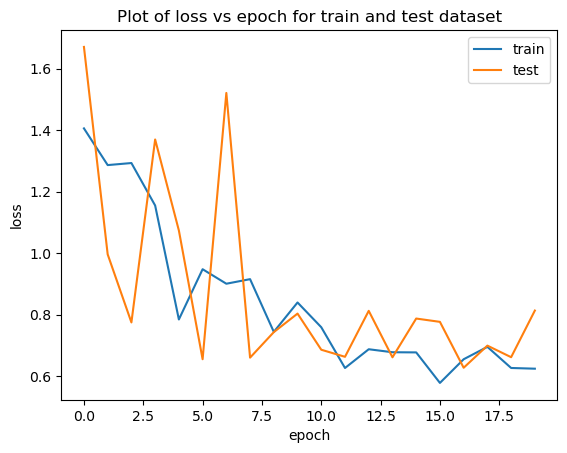

In [65]:
# Plot of accuracy vs epoch for train and test dataset
plt.plot(modelhistory.history['accuracy'])
plt.plot(modelhistory.history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

# Plot of loss vs epoch for train and test dataset
plt.plot(modelhistory.history['loss'])
plt.plot(modelhistory.history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [66]:
y_pred = cnnmodel.predict(X_test, verbose=1)
y_pred = np.argmax(y_pred,axis=1)

#y_prob = cnnmodel.predict_proba(X_test)[:, 1]

dl_acc = accuracy_score(y_pred, y_test)
dl_prec = precision_score(y_pred, y_test,average='weighted')
dl_rec = recall_score(y_pred, y_test,average='weighted')
dl_f1 = f1_score(y_pred, y_test,average='weighted')
dl_auroc = roc_auc_score(y_valid, clf.predict_proba(X_valid)[:, 1])

3/3 [==============================] - 0s 3ms/step


In [67]:
storeResults('CNN',dl_acc,dl_prec,dl_rec,dl_f1,dl_auroc)

# GRU

In [68]:
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten, LSTM, GRU, Bidirectional

In [69]:
def create_model(input_shape):
    # create model
    d = 0.25
    model = Sequential()
    
    model.add(GRU(32, input_shape=input_shape, activation='relu', return_sequences=True))
    model.add(Dropout(d))

    model.add(GRU(64, input_shape=input_shape, activation='relu', return_sequences=True))
    model.add(Dropout(d))
        
    model.add(GRU(128, input_shape=input_shape, activation='relu', return_sequences=True))
    model.add(Dropout(d))

    model.add(GRU(256, input_shape=input_shape, activation='relu', return_sequences=False))
    model.add(Dropout(d))
   
    model.add(Dense(32,kernel_initializer="uniform",activation='relu'))        
    model.add(Dense(2,kernel_initializer="uniform",activation='linear'))
    
    # compile model
    adam = tf.keras.optimizers.Adam(learning_rate=0.001, decay=0.00001)
    #model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    #model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


In [70]:
model = create_model(input_shape=(10,1))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 10, 32)            3360      
                                                                 
 dropout_1 (Dropout)         (None, 10, 32)            0         
                                                                 
 gru_1 (GRU)                 (None, 10, 64)            18816     
                                                                 
 dropout_2 (Dropout)         (None, 10, 64)            0         
                                                                 
 gru_2 (GRU)                 (None, 10, 128)           74496     
                                                                 
 dropout_3 (Dropout)         (None, 10, 128)           0         
                                                                 
 gru_3 (GRU)                 (None, 256)              

In [71]:
history=model.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=20, batch_size=2, verbose=1)

Epoch 1/20
135/135 [==============================] - 14s 92ms/step - loss: 8.2990 - accuracy: 0.4704 - val_loss: 5.9258 - val_accuracy: 0.6324
Epoch 2/20
135/135 [==============================] - 12s 91ms/step - loss: 8.5963 - accuracy: 0.4667 - val_loss: 5.9258 - val_accuracy: 0.6324
Epoch 3/20
135/135 [==============================] - 12s 91ms/step - loss: 8.5963 - accuracy: 0.4667 - val_loss: 5.9258 - val_accuracy: 0.6324
Epoch 4/20
135/135 [==============================] - 12s 89ms/step - loss: 8.5963 - accuracy: 0.4667 - val_loss: 5.9258 - val_accuracy: 0.6324
Epoch 5/20
135/135 [==============================] - 12s 89ms/step - loss: 8.5963 - accuracy: 0.4667 - val_loss: 5.9258 - val_accuracy: 0.6324
Epoch 6/20
135/135 [==============================] - 12s 92ms/step - loss: 8.5963 - accuracy: 0.4667 - val_loss: 5.9258 - val_accuracy: 0.6324
Epoch 7/20
135/135 [==============================] - 12s 92ms/step - loss: 8.5963 - accuracy: 0.4667 - val_loss: 5.9258 - val_accuracy:

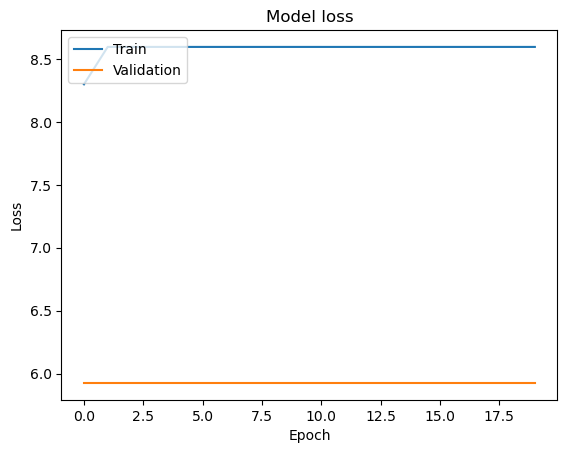

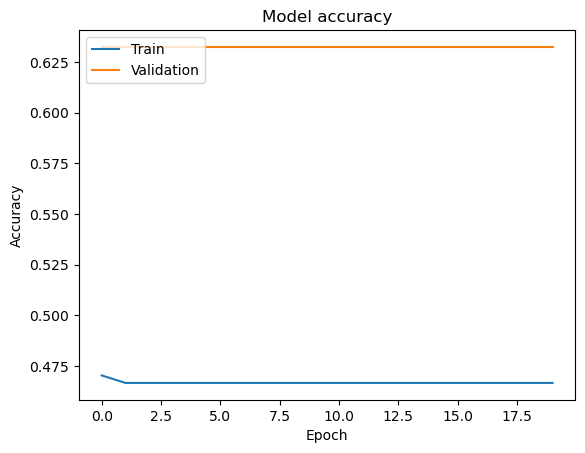

3/3 [==============================] - 0s 27ms/step


In [72]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('loss.png', format='png', dpi=1200)
plt.show()


# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('accuracy.png', format='png', dpi=1200)
plt.show()

y_pred = model.predict(X_test, verbose=1)
y_pred = np.argmax(y_pred,axis=1)


#y_prob = cnnmodel.predict_proba(X_test)[:, 1]

dl_acc = accuracy_score(y_pred, y_test)
dl_prec = precision_score(y_pred, y_test,average='weighted')
dl_rec = recall_score(y_pred, y_test,average='weighted')
dl_f1 = f1_score(y_pred, y_test,average='weighted')
dl_auroc = roc_auc_score(y_valid, clf.predict_proba(X_valid)[:, 1])

In [73]:
storeResults('GRU',dl_acc,dl_prec,dl_rec,dl_f1,dl_auroc)

# Bi-LSTM

In [74]:
def create_model(input_shape):
    # create model
    d = 0.25
    model = Sequential()
    
    model.add(Bidirectional(LSTM(32, input_shape=input_shape, activation='relu', return_sequences=True)))
    model.add(Dropout(d))

    model.add(Bidirectional(LSTM(64, input_shape=input_shape, activation='relu', return_sequences=True)))
    model.add(Dropout(d))
        
    model.add(Bidirectional(LSTM(128, input_shape=input_shape, activation='relu', return_sequences=True)))
    model.add(Dropout(d))

    model.add(Bidirectional(LSTM(256, input_shape=input_shape, activation='relu', return_sequences=False)))
    model.add(Dropout(d))
   
    model.add(Dense(32,kernel_initializer="uniform",activation='relu'))        
    model.add(Dense(2,kernel_initializer="uniform",activation='linear'))
    
    # compile model
    adam = tf.keras.optimizers.Adam(learning_rate=0.001, decay=0.00001)
    #model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    #model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


In [75]:
model = create_model(input_shape=(10,1))
#model.summary()

In [76]:
history=model.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=20, batch_size=2, verbose=1)

Epoch 1/20
135/135 [==============================] - 28s 171ms/step - loss: 6.0308 - accuracy: 0.4111 - val_loss: 10.1923 - val_accuracy: 0.3676
Epoch 2/20
135/135 [==============================] - 22s 162ms/step - loss: 7.5218 - accuracy: 0.5333 - val_loss: 10.1923 - val_accuracy: 0.3676
Epoch 3/20
135/135 [==============================] - 22s 165ms/step - loss: 7.5218 - accuracy: 0.5333 - val_loss: 10.1923 - val_accuracy: 0.3676
Epoch 4/20
135/135 [==============================] - 23s 167ms/step - loss: 7.5218 - accuracy: 0.5333 - val_loss: 10.1923 - val_accuracy: 0.3676
Epoch 5/20
135/135 [==============================] - 22s 167ms/step - loss: 7.5218 - accuracy: 0.5333 - val_loss: 10.1923 - val_accuracy: 0.3676
Epoch 6/20
135/135 [==============================] - 22s 164ms/step - loss: 7.5218 - accuracy: 0.5333 - val_loss: 10.1923 - val_accuracy: 0.3676
Epoch 7/20
135/135 [==============================] - 22s 162ms/step - loss: 7.5218 - accuracy: 0.5333 - val_loss: 10.1923 -

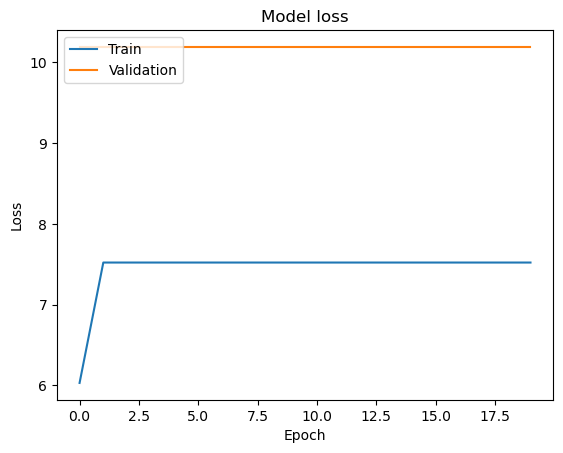

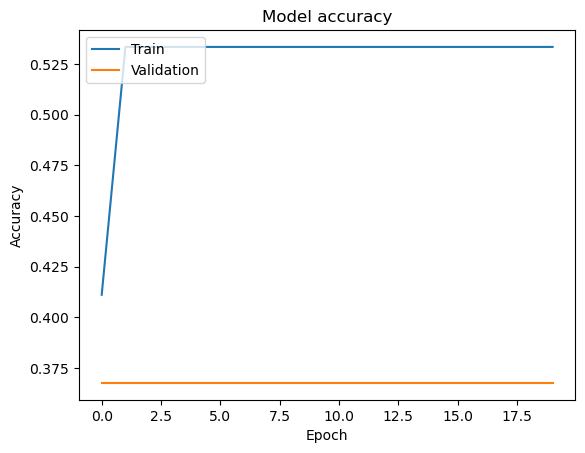

3/3 [==============================] - 1s 44ms/step


In [77]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('loss.png', format='png', dpi=1200)
plt.show()


# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('accuracy.png', format='png', dpi=1200)
plt.show()

y_pred = model.predict(X_test, verbose=1)
y_pred = np.argmax(y_pred,axis=1)


#y_prob = cnnmodel.predict_proba(X_test)[:, 1]

dl_acc = accuracy_score(y_pred, y_test)
dl_prec = precision_score(y_pred, y_test,average='weighted')
dl_rec = recall_score(y_pred, y_test,average='weighted')
dl_f1 = f1_score(y_pred, y_test,average='weighted')
dl_auroc = roc_auc_score(y_valid, clf.predict_proba(X_valid)[:, 1])

In [78]:
storeResults('Bi-LSTM',dl_acc,dl_prec,dl_rec,dl_f1,dl_auroc)

# CNN + LSTM

In [79]:
import tensorflow as tf
tf.keras.backend.clear_session()

model_en = tf.keras.models.Sequential([tf.keras.layers.Conv1D(filters=64,kernel_size=5,strides=1,padding="causal",activation="relu",input_shape=(X_train.shape[1],X_train.shape[2])),
    tf.keras.layers.MaxPooling1D(pool_size=2, strides=1, padding="valid"),
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, strides=1, padding="causal", activation="relu"),
    tf.keras.layers.MaxPooling1D(pool_size=2, strides=1, padding="valid"),
    tf.keras.layers.LSTM(128, return_sequences=True),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(2)
])

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(5e-4,
                                                             decay_steps=1000000,
                                                             decay_rate=0.98,
                                                             staircase=False)

model_en.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.SGD(learning_rate=lr_schedule, momentum=0.8),
              metrics=['acc'])
model_en.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 10, 64)            384       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 9, 64)            0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 9, 32)             6176      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 8, 32)            0         
 1D)                                                             
                                                                 
 lstm (LSTM)                 (None, 8, 128)            82432     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [80]:
modelhistory = model_en.fit(X_train, Y_train, epochs=20, verbose=verbose, validation_split=0.2, batch_size = 2)

Epoch 1/20
108/108 [==============================] - 3s 11ms/step - loss: 0.2609 - acc: 0.6389 - val_loss: 0.1774 - val_acc: 0.8519
Epoch 2/20
108/108 [==============================] - 1s 8ms/step - loss: 0.1693 - acc: 0.8148 - val_loss: 0.1192 - val_acc: 0.8704
Epoch 3/20
108/108 [==============================] - 1s 8ms/step - loss: 0.1305 - acc: 0.8657 - val_loss: 0.1179 - val_acc: 0.8333
Epoch 4/20
108/108 [==============================] - 1s 8ms/step - loss: 0.1109 - acc: 0.8843 - val_loss: 0.1049 - val_acc: 0.8704
Epoch 5/20
108/108 [==============================] - 1s 8ms/step - loss: 0.1177 - acc: 0.8657 - val_loss: 0.1006 - val_acc: 0.8519
Epoch 6/20
108/108 [==============================] - 1s 8ms/step - loss: 0.1061 - acc: 0.8843 - val_loss: 0.1004 - val_acc: 0.8519
Epoch 7/20
108/108 [==============================] - 1s 8ms/step - loss: 0.1019 - acc: 0.8796 - val_loss: 0.1121 - val_acc: 0.8519
Epoch 8/20
108/108 [==============================] - 1s 8ms/step - loss: 0

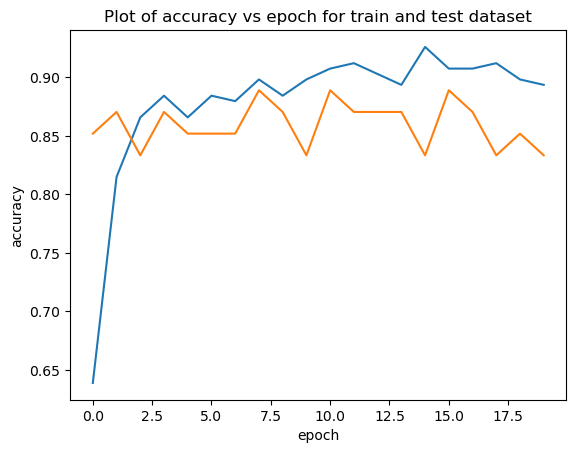

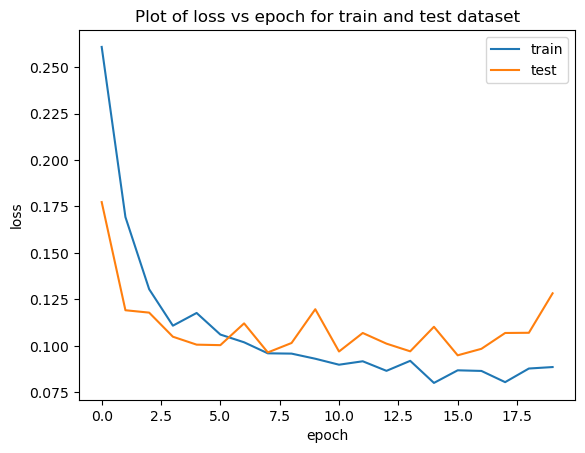

In [81]:
# Plot of accuracy vs epoch for train and test dataset
plt.plot(modelhistory.history['acc'])
plt.plot(modelhistory.history['val_acc'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

# Plot of loss vs epoch for train and test dataset
plt.plot(modelhistory.history['loss'])
plt.plot(modelhistory.history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [82]:
y_pred = model_en.predict(X_test, verbose=1)
y_pred = np.argmax(y_pred,axis=1)

#y_prob = cnnmodel.predict_proba(X_test)[:, 1]

dl_acc = accuracy_score(y_pred, y_test)
dl_prec = precision_score(y_pred, y_test,average='weighted')
dl_rec = recall_score(y_pred, y_test,average='weighted')
dl_f1 = f1_score(y_pred, y_test,average='weighted')
dl_auroc = roc_auc_score(y_valid, clf.predict_proba(X_valid)[:, 1])

3/3 [==============================] - 0s 7ms/step


In [83]:
storeResults('CNN + LSTM',dl_acc,dl_prec,dl_rec,dl_f1,dl_auroc)

# Transformer

In [84]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, BatchNormalization, Input
from keras import regularizers

In [85]:
# splitting the dataset 80% for training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res, test_size=0.20, random_state=42)

In [86]:
train_min = X_train.min()
train_max = X_train.max()
#x_train = (x_train - train_min) / (train_max - train_min)
#x_test = (x_test - train_min) / (train_max - train_min)

In [87]:
positives = x_train[y_train == 1]
negatives = x_train[y_train == 0]

In [88]:
## input layer 
input_layer = Input(shape=negatives.shape[1:])

## encoding part
encoded = Dense(100, activation='tanh', activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoded = BatchNormalization()(encoded)
encoded = Dense(75, activation='tanh')(encoded)
encoded = BatchNormalization()(encoded)
encoded = Dense(50, activation='relu')(encoded)
encoded = BatchNormalization()(encoded)
encoded = Dense(25, activation='relu')(encoded)
encoded = BatchNormalization()(encoded)
encoded = Dense(7, activation='relu')(encoded)

## decoding part
decoded = Dense(7, activation='relu')(encoded)
decoded = BatchNormalization()(decoded)
decoded = Dense(25, activation='relu')(decoded)
decoded = BatchNormalization()(decoded)
decoded = Dense(50, activation='relu')(decoded)
decoded = BatchNormalization()(decoded)
decoded = Dense(75, activation='tanh')(decoded)
decoded = BatchNormalization()(decoded)
decoded = Dense(100, activation='tanh')(decoded)

## output layer
output_layer = Dense(negatives.shape[1], activation='relu')(decoded)

In [89]:
autoencoder = Model(input_layer, output_layer)
autoencoder.compile(optimizer="adadelta", loss="mse", metrics=['accuracy'])

In [90]:
autoencoder.fit(negatives, negatives, batch_size = 2, epochs = 10, shuffle = True)

Epoch 1/10
72/72 [==============================] - 3s 18ms/step - loss: 0.3075 - accuracy: 0.0833
Epoch 2/10
72/72 [==============================] - 1s 17ms/step - loss: 0.3072 - accuracy: 0.1042
Epoch 3/10
72/72 [==============================] - 1s 18ms/step - loss: 0.2745 - accuracy: 0.1111
Epoch 4/10
72/72 [==============================] - 1s 18ms/step - loss: 0.2814 - accuracy: 0.1389
Epoch 5/10
72/72 [==============================] - 1s 18ms/step - loss: 0.2721 - accuracy: 0.1319
Epoch 6/10
72/72 [==============================] - 1s 17ms/step - loss: 0.2962 - accuracy: 0.1667
Epoch 7/10
72/72 [==============================] - 1s 17ms/step - loss: 0.2901 - accuracy: 0.1389
Epoch 8/10
72/72 [==============================] - 1s 17ms/step - loss: 0.2836 - accuracy: 0.1528
Epoch 9/10
72/72 [==============================] - 1s 17ms/step - loss: 0.2809 - accuracy: 0.1736
Epoch 10/10
72/72 [==============================] - 1s 17ms/step - loss: 0.2789 - accuracy: 0.1389


In [91]:
hidden_representation = Sequential()
hidden_representation.add(autoencoder.layers[0])
hidden_representation.add(autoencoder.layers[1])
hidden_representation.add(autoencoder.layers[2])
hidden_representation.add(autoencoder.layers[3])
hidden_representation.add(autoencoder.layers[4])
hidden_representation.add(autoencoder.layers[5])
hidden_representation.add(autoencoder.layers[6])
hidden_representation.add(autoencoder.layers[7])
hidden_representation.add(autoencoder.layers[8])
hidden_representation.add(autoencoder.layers[9])

In [92]:
x_train_transformed = hidden_representation.predict(X_train)
x_test_transformed = hidden_representation.predict(X_test)

3/3 [==============================] - 0s 2ms/step


In [93]:
predictor = Sequential()
predictor.add(Dense(64, activation='relu', input_shape=x_train_transformed.shape[1:]))
predictor.add(BatchNormalization())
predictor.add(Dropout(0.25))
predictor.add(Dense(64, activation='relu'))
predictor.add(BatchNormalization())
predictor.add(Dense(64, activation='relu'))
predictor.add(BatchNormalization())
predictor.add(Dense(64, activation='tanh'))
predictor.add(BatchNormalization())
predictor.add(Dense(1, activation='sigmoid'))

In [94]:
predictor.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])
history = predictor.fit(x_train_transformed, y_train, batch_size=2, epochs=20, shuffle=True)

Epoch 1/20
135/135 [==============================] - 2s 10ms/step - loss: 0.7892 - accuracy: 0.5778
Epoch 2/20
135/135 [==============================] - 1s 10ms/step - loss: 0.7214 - accuracy: 0.6222
Epoch 3/20
135/135 [==============================] - 1s 10ms/step - loss: 0.6360 - accuracy: 0.6556
Epoch 4/20
135/135 [==============================] - 1s 10ms/step - loss: 0.6813 - accuracy: 0.6481
Epoch 5/20
135/135 [==============================] - 1s 10ms/step - loss: 0.6112 - accuracy: 0.6741
Epoch 6/20
135/135 [==============================] - 1s 10ms/step - loss: 0.6858 - accuracy: 0.6259
Epoch 7/20
135/135 [==============================] - 1s 10ms/step - loss: 0.6125 - accuracy: 0.6778
Epoch 8/20
135/135 [==============================] - 1s 10ms/step - loss: 0.5381 - accuracy: 0.7593
Epoch 9/20
135/135 [==============================] - 1s 10ms/step - loss: 0.5974 - accuracy: 0.6889
Epoch 10/20
135/135 [==============================] - 1s 10ms/step - loss: 0.6140 - accura

In [95]:
y_pred = predictor.predict(x_test_transformed)
y_pred = np.argmax(y_pred,axis=1)

dl_acc = accuracy_score(y_pred, y_test)
dl_prec = precision_score(y_pred, y_test,average='weighted')
dl_rec = recall_score(y_pred, y_test,average='weighted')
dl_f1 = f1_score(y_pred, y_test,average='weighted')
dl_auroc = roc_auc_score(y_valid, clf.predict_proba(X_valid)[:, 1])

3/3 [==============================] - 0s 5ms/step


In [96]:
storeResults('Transformer',dl_acc,dl_prec,dl_rec,dl_f1,dl_auroc)

# Comparison

In [97]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                        'Precision': precision,
                        'Recall'   : recall,
                        'F1-Score': f1score,
                       'AUC ROC': auc
                      })

In [98]:
result

,ML Model,Accuracy,Precision,Recall,F1-Score,AUC ROC
0,Logistic Regression,0.882,0.893,0.882,0.880,0.967
1,SVM,0.838,0.864,0.838,0.835,0.961
2,NaiveBayes,0.882,0.893,0.882,0.880,0.931
3,RandomForest,0.868,0.895,0.868,0.865,1.000
4,AdaBoost,0.912,0.924,0.912,0.910,0.999
5,XGBoost,0.882,0.904,0.882,0.880,1.000
6,MLP,0.912,0.916,0.912,0.911,0.992
7,LightGBM,0.838,0.864,0.838,0.835,0.974
8,Proposed,0.853,0.873,0.853,0.850,0.989
9,Extension,1.000,1.000,1.000,1.000,0.955


# Modelling

In [99]:
import joblib
filename = 'models/model_et.sav'
joblib.dump(clf, filename)

['models/model_et.sav']

# Graph

In [100]:
classifier = ML_Model
y_pos = np.arange(len(classifier))

# Accuracy

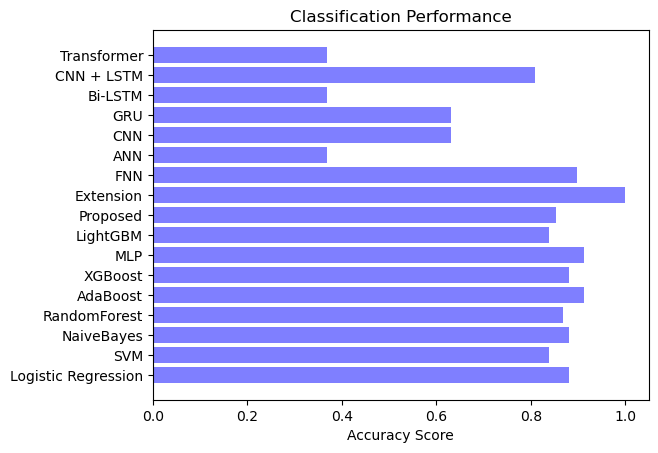

In [101]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, accuracy, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Accuracy Score')
plt2.title('Classification Performance')
plt2.show()

# Precision

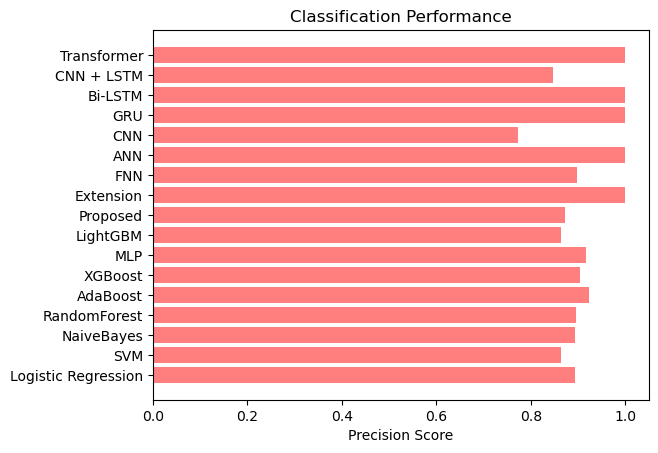

In [102]:
plt2.barh(y_pos, precision, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

# Recall

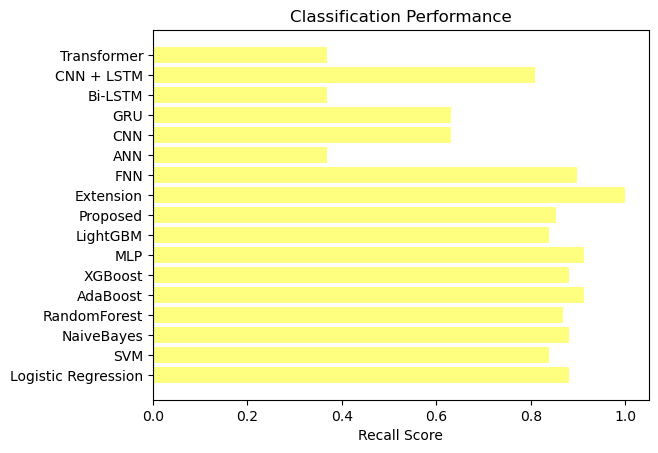

In [103]:
plt2.barh(y_pos, recall, align='center', alpha=0.5,color='yellow')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()

# F1 Score

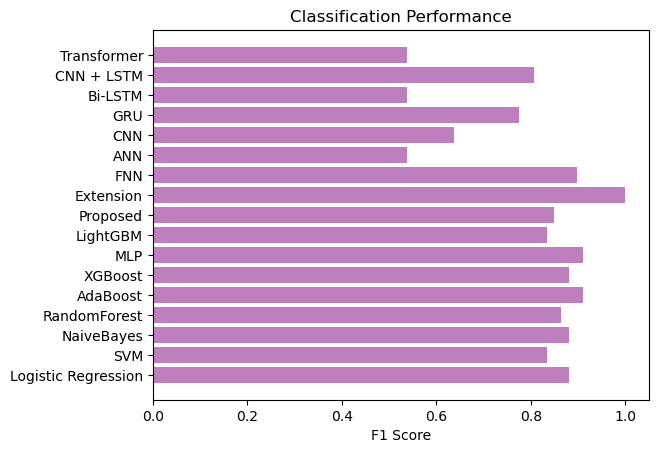

In [104]:
plt2.barh(y_pos, f1score, align='center', alpha=0.5,color='purple')
plt2.yticks(y_pos, classifier)
plt2.xlabel('F1 Score')
plt2.title('Classification Performance')
plt2.show()

# AUC ROC

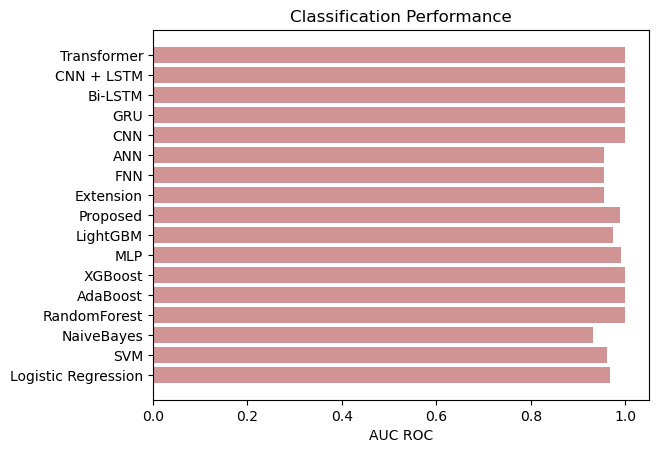

In [105]:
plt2.barh(y_pos, auc, align='center', alpha=0.5,color='brown')
plt2.yticks(y_pos, classifier)
plt2.xlabel('AUC ROC')
plt2.title('Classification Performance')
plt2.show()